#PROBLEM STATEMENT
Belum memiliki strategi yang tepat untuk menawarkan jenis produk yang sesuai dengan segmen calon nasabah yang akan direkrut

#OBJECTIVE
Membuat Sebuah model Clustering untuk mengetahui kepemilikan produk berdasarkan demografi nasabah yang saat ini sudah menggunakan layanan FundFusion dengan silhouette Score > 0.7

#VARIABEL YANG TERSEDIA
Dari dataset yang dimiliki terdapat beberapa data yang tersedia:
1.GCIF : Unique Identifier Nasabah
2.Area : Lokasi Nasabah(Jakarta, Bogor, Bandung, Surabaya, Jogja,Solo)
3.Jalur_Pembukaan:Touch Points Nasabah membuka produk -> Cabang,Telemarketing,Aplikasi digital, internet banking
4.Usia: Usia Nasabah
5.Vintage:Durasi Menjadi Nasabah (sejak membuka akun)
6.Jenis_Kelamin:Laki-Laki(1)& perempuan(0)
7.Status_Perkawinan:Belum Menikah(0), Menikah(1), Janda/Duda(3)
8.Jumlah_Anak:Jumlah anak Nasabah(Numerik)
9.Pendidikan:Status pendidikan terakhir ->Tidak memiliki pendidikan formal (0),Sd(1),Smp(2),sma(3),Sarjana(4),Magister(5),Dotor(6)
10.Produk_Tabungan:Status kepemilikan produk (Yes/1,No/0)
11.Produk_Deposito:Statu Kepemilikan produk (Yes/1,No/0)
12.Produk_Kartu_Kredit:Status Kepemilikan Produk (Yes/1,No/0)
13.Produk_Kredit_Rumah:Status kepemilikan produk (Yes/1,No/0)
14.Produk_Kredit_Kendaraan:Status Kepemilikan Produk (Yes/1,No/0)
15.Produk_Kredit_Dana_Tunai:Status Kepemilikan Produk(Yes/1,No/0)
16.Total_Kepemilikan_Produk:Jumlah produk yang dimiliki (Penjumlahan dari produk2)
17.Pendapatan_Tahunan:Rata rata pendapatan dalam setahun
18.Total_Relationship_Balance:Total Asset Nasabah dalam Cutoff Bulan Observasi

#EXPERIMENT

Point of view:
1. Dikelompokkan berdasarkan demografis untuk dicari pattern kepemilikan produk
2. Dikelompokkan berdasarkan kepemilikan produk untuk icari pattern berdsarkan demografis

#IMPORT PACKAGE

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

#Data for Clustering

In [6]:
path_1 = "http://raw.githubusercontent.com/brainspopper/dataset/main/clustering_data.csv"
data = pd.read_csv (path_1)

In [7]:
data.dtypes

GCIF                           object
Area                           object
Jalur_Pembukaan                object
Vintage                        object
Usia                          float64
Jenis_Kelamin                  object
Status_Perkawinan              object
Jumlah_Anak                     int64
Pendidikan                     object
Produk_Tabungan                 int64
Produk_Deposito                 int64
Produk_Kartu_Kredit             int64
Produk_Kredit_Rumah             int64
Produk_Kredit_Kendaraan         int64
Produk_Kredit_Dana_Tunai        int64
Total_Kepemilikan_Produk        int64
Pendapatan_Tahunan              int64
Total_Relationship_Balance      int64
dtype: object

In [8]:
data.head()

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,G28036,Bogor,Internet Banking,< 1 Tahun,69.0,Laki-laki,Menikah,3,Doktor,1,0,0,0,0,0,1,747,44607
1,G18528,Jakarta,Telemarketing,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
2,G22419,Surabaya,Telemarketing,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
3,G04482,Bandung,Cabang,< 1 Tahun,45.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,431,417250579
4,G07807,Bandung,Aplikasi Digital,< 1 Tahun,34.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,184,453573593


#Data Understanding

In [9]:
data.groupby(('Area'))['Area'].count()

Area
Bandung     6917
Bogor       1191
Jakarta     7017
Jogja       3001
Solo        5001
Surabaya    5002
Name: Area, dtype: int64

In [10]:
data.groupby('Area').mean()

<ipython-input-10-69ad0e428702>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Area').mean()


,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Area,,,,,,,,,,,
Bandung,42.562310,1.296516,0.925401,0.599682,0.329767,0.587393,0.163076,0.537516,3.142836,405.124910,2.454722e+08
Bogor,42.660451,1.366919,0.921075,0.596977,0.324097,0.582704,0.160369,0.554996,3.140218,402.227540,2.499853e+08
Jakarta,42.696995,1.322930,0.925467,0.603534,0.336184,0.590708,0.169873,0.540829,3.166595,406.478552,2.485876e+08
Jogja,42.512422,1.309897,0.934355,0.608464,0.333555,0.594469,0.158614,0.535155,3.164612,402.694768,2.496616e+08
Solo,42.445452,1.270746,0.922416,0.603479,0.337932,0.604679,0.156969,0.540492,3.165967,408.010198,2.507478e+08
Surabaya,42.768980,1.284486,0.927629,0.608357,0.329668,0.585566,0.168533,0.528589,3.148341,409.074370,2.523277e+08


In [11]:
data.groupby(('Vintage'))['Vintage'].count()

Vintage
2 - 3 Tahun    13953
< 1 Tahun       9278
> 4 Tahun       4898
Name: Vintage, dtype: int64

In [12]:
data.groupby('Vintage').mean()

<ipython-input-12-ae475ab7a408>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Vintage').mean()


,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Vintage,,,,,,,,,,,
2 - 3 Tahun,42.578850,1.291694,0.927256,0.607755,0.328531,0.589336,0.163764,0.539311,3.155952,407.679639,2.489367e+08
< 1 Tahun,42.689341,1.294676,0.931235,0.592585,0.336495,0.594201,0.164798,0.523389,3.142703,395.611231,2.486679e+08
> 4 Tahun,42.571866,1.338301,0.912822,0.613107,0.338914,0.592691,0.163536,0.560637,3.181707,422.593508,2.500646e+08


In [13]:
data.groupby(('Jalur_Pembukaan'))['Jalur_Pembukaan'].count()

Jalur_Pembukaan
Aplikasi Digital     6216
Cabang               5856
Internet Banking     5795
Telemarketing       10262
Name: Jalur_Pembukaan, dtype: int64

In [14]:
data.groupby('Jalur_Pembukaan').mean()

<ipython-input-14-6f3989355d05>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Jalur_Pembukaan').mean()


,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Jalur_Pembukaan,,,,,,,,,,,
Aplikasi Digital,42.442089,1.292149,0.930180,0.598456,0.323681,0.593147,0.165541,0.535714,3.146718,405.278314,2.489950e+08
Cabang,42.560627,1.308743,0.924180,0.610143,0.325478,0.583675,0.153518,0.544740,3.141735,409.923156,2.456661e+08
Internet Banking,42.723992,1.302502,0.928387,0.597929,0.347368,0.598965,0.169802,0.531493,3.173943,406.593270,2.517532e+08
Telemarketing,42.676514,1.300526,0.923309,0.606412,0.334730,0.590821,0.165952,0.538589,3.159813,404.674527,2.494725e+08


In [15]:
data.groupby(('Status_Perkawinan'))['Status_Perkawinan'].count()

Status_Perkawinan
Belum Menikah     8168
Cerai             4077
Janda/Duda        4045
Menikah          11839
Name: Status_Perkawinan, dtype: int64

In [16]:
data.groupby(('Status_Perkawinan')).mean()

<ipython-input-16-0724682ed50c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(('Status_Perkawinan')).mean()


,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Status_Perkawinan,,,,,,,,,,,
Belum Menikah,39.571621,0.000000,1.000000,0.596107,0.333374,0.331660,0.160749,0.499633,2.921523,420.636141,2.423448e+08
Cerai,50.226883,2.003679,1.000000,0.607555,0.337258,0.509688,0.172676,0.389747,3.016924,426.269070,2.393499e+08
Janda/Duda,NaN,1.201978,1.000000,0.609889,0.337948,0.597281,0.161187,0.401731,3.108035,289.648208,2.474754e+08
Menikah,42.084467,1.989948,0.824309,0.605457,0.329504,0.797027,0.164372,0.661542,3.382211,429.378833,2.575412e+08


#Data Preparation

Pengecekan data duplikat dan Missing data


In [17]:
data.isnull().sum()

GCIF                             0
Area                             0
Jalur_Pembukaan                  0
Vintage                          0
Usia                          4045
Jenis_Kelamin                    0
Status_Perkawinan                0
Jumlah_Anak                      0
Pendidikan                       0
Produk_Tabungan                  0
Produk_Deposito                  0
Produk_Kartu_Kredit              0
Produk_Kredit_Rumah              0
Produk_Kredit_Kendaraan          0
Produk_Kredit_Dana_Tunai         0
Total_Kepemilikan_Produk         0
Pendapatan_Tahunan               0
Total_Relationship_Balance       0
dtype: int64

In [18]:
data = data.dropna()

In [19]:
data.isnull().sum()

GCIF                          0
Area                          0
Jalur_Pembukaan               0
Vintage                       0
Usia                          0
Jenis_Kelamin                 0
Status_Perkawinan             0
Jumlah_Anak                   0
Pendidikan                    0
Produk_Tabungan               0
Produk_Deposito               0
Produk_Kartu_Kredit           0
Produk_Kredit_Rumah           0
Produk_Kredit_Kendaraan       0
Produk_Kredit_Dana_Tunai      0
Total_Kepemilikan_Produk      0
Pendapatan_Tahunan            0
Total_Relationship_Balance    0
dtype: int64

In [20]:
data.duplicated().sum()

0

#Pengecekan data outlier

In [21]:
data.count()

GCIF                          24084
Area                          24084
Jalur_Pembukaan               24084
Vintage                       24084
Usia                          24084
Jenis_Kelamin                 24084
Status_Perkawinan             24084
Jumlah_Anak                   24084
Pendidikan                    24084
Produk_Tabungan               24084
Produk_Deposito               24084
Produk_Kartu_Kredit           24084
Produk_Kredit_Rumah           24084
Produk_Kredit_Kendaraan       24084
Produk_Kredit_Dana_Tunai      24084
Total_Kepemilikan_Produk      24084
Pendapatan_Tahunan            24084
Total_Relationship_Balance    24084
dtype: int64

In [22]:
# Mendeteksi dan mengatasi outliers (contoh dengan Z-score)
from scipy import stats
z_scores = stats.zscore(data[['Usia','Pendapatan_Tahunan','Total_Relationship_Balance']])
data = data[(z_scores < 3).all(axis=1)] #Menghapus data dengan Z-scores lebih dari 3

In [23]:
data.count()

GCIF                          23704
Area                          23704
Jalur_Pembukaan               23704
Vintage                       23704
Usia                          23704
Jenis_Kelamin                 23704
Status_Perkawinan             23704
Jumlah_Anak                   23704
Pendidikan                    23704
Produk_Tabungan               23704
Produk_Deposito               23704
Produk_Kartu_Kredit           23704
Produk_Kredit_Rumah           23704
Produk_Kredit_Kendaraan       23704
Produk_Kredit_Dana_Tunai      23704
Total_Kepemilikan_Produk      23704
Pendapatan_Tahunan            23704
Total_Relationship_Balance    23704
dtype: int64

#Filtering Data Telemarketing Only

In [24]:
data0 = data[data['Jalur_Pembukaan']=='Telemarketing']

In [25]:
data0

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
1,G18528,Jakarta,Telemarketing,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
2,G22419,Surabaya,Telemarketing,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
7,G13193,Solo,Telemarketing,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
8,G09296,Jakarta,Telemarketing,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
9,G09228,Jakarta,Telemarketing,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28089,G19583,Bandung,Telemarketing,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
28090,G18081,Jakarta,Telemarketing,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
28092,G18530,Bandung,Telemarketing,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
28095,G03782,Jogja,Telemarketing,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


In [26]:
data0 = data0.drop(columns=['GCIF','Jalur_Pembukaan']).reset_index(drop=True)

In [27]:
data0 = data0.reset_index()

In [28]:
data0

,index,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
1,1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
2,2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
3,3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
4,4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
8649,8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
8650,8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
8651,8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


#Pembagian Dataset Experiment
1. Experimen 0 -> Semua Variabel Digunakan
2. Experimen 1 -> Menggunakan Demographics
3. Experimen 2 -> Menggunakan Related Variable

In [29]:
data1 = data0.iloc[:,1:8]

In [30]:
data1

,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan
0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor
1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor
2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor
3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor
4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor
...,...,...,...,...,...,...,...
8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal
8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal
8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal
8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal


In [31]:
data2 = data0.iloc[:,8:17]

In [32]:
data2.head()

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,1,0,0,0,0,0,1,198,10668586
1,1,0,0,0,0,0,1,280,299076075
2,1,0,0,0,0,0,1,295,76653088
3,1,0,0,0,0,0,1,443,247157199
4,1,0,0,0,0,0,1,257,27585562


#Melakukan Encoding untuk data Category

encoding itu fungsinya untuk membuat isi dari kolom tadi menjadi terpecah menjadi beberapa kolom
misal di kolom jenis kelamin ada 2 isi kategori yaitu laki laki dan perempuan
maka nanti akan ada 2 kolom baru terbentuk, Jenis_Kelamin_Laki_Laki dan Jenis_Kelamin_Perempuan

In [33]:
data1 = pd.get_dummies(data1, columns=['Area','Jenis_Kelamin','Status_Perkawinan','Pendidikan','Vintage'])

In [34]:
data1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,...,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,23.0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,30.0,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
2,29.0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3,49.0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,21.0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
8649,58.0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
8650,42.0,3,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
8651,44.0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0


#Standarisasi data numerik

In [35]:
predname_num = data2.columns
predname_num

Index(['Produk_Tabungan', 'Produk_Deposito', 'Produk_Kartu_Kredit',
       'Produk_Kredit_Rumah', 'Produk_Kredit_Kendaraan',
       'Produk_Kredit_Dana_Tunai', 'Total_Kepemilikan_Produk',
       'Pendapatan_Tahunan', 'Total_Relationship_Balance'],
      dtype='object')

In [36]:
from sklearn.preprocessing import StandardScaler
pt = StandardScaler()
X_num = pd.DataFrame(pt.fit_transform(data2))
X_num.head()

,0,1,2,3,4,5,6,7,8
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416


In [37]:
X_num.columns = predname_num
X_num.head()

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416


#Pengecekan Korelasi

In [38]:
corrtest1 = data1.corr().abs()
corrtest2 = X_num.corr().abs()

In [39]:
corrtest1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,...,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
Usia,1.000000,0.105752,0.015472,0.010122,0.000703,0.004196,0.009153,0.000800,0.022998,0.022998,...,0.019497,0.002532,0.017649,0.007478,0.000769,0.009315,0.023562,0.009375,0.014677,0.005059
Jumlah_Anak,0.105752,1.000000,0.004419,0.008073,0.006375,0.003399,0.000538,0.020592,0.004123,0.004123,...,0.010529,0.012402,0.002656,0.005471,0.004266,0.001571,0.012021,0.012883,0.000549,0.015414
Area_Bandung,0.015472,0.004419,1.000000,0.075688,0.434134,0.129781,0.165969,0.173396,0.005038,0.005038,...,0.004182,0.018846,0.009738,0.008150,0.008533,0.002294,0.003398,0.004687,0.007997,0.003280
Area_Bogor,0.010122,0.008073,0.075688,1.000000,0.160824,0.048077,0.061483,0.064234,0.017781,0.017781,...,0.014371,0.018786,0.005275,0.019397,0.005195,0.001137,0.011784,0.006728,0.011535,0.004774
Area_Jakarta,0.000703,0.006375,0.434134,0.160824,1.000000,0.275762,0.352656,0.368437,0.016156,0.016156,...,0.006520,0.004666,0.005406,0.001637,0.021187,0.003183,0.004680,0.000667,0.002865,0.002436
Area_Jogja,0.004196,0.003399,0.129781,0.048077,0.275762,1.000000,0.105423,0.110141,0.000914,0.000914,...,0.001621,0.012903,0.014696,0.005862,0.002432,0.017757,0.003543,0.001066,0.001924,0.000867
Area_Solo,0.009153,0.000538,0.165969,0.061483,0.352656,0.105423,1.000000,0.140853,0.001620,0.001620,...,0.012661,0.008184,0.002844,0.000952,0.013671,0.004444,0.016788,0.023666,0.008069,0.020266
Area_Surabaya,0.000800,0.020592,0.173396,0.064234,0.368437,0.110141,0.140853,1.000000,0.010665,0.010665,...,0.006102,0.019120,0.014693,0.010579,0.004389,0.011413,0.008367,0.024732,0.008411,0.021204
Jenis_Kelamin_Laki-laki,0.022998,0.004123,0.005038,0.017781,0.016156,0.000914,0.001620,0.010665,1.000000,1.000000,...,0.011471,0.003639,0.010552,0.001215,0.017649,0.010154,0.002050,0.000872,0.006728,0.006585
Jenis_Kelamin_Perempuan,0.022998,0.004123,0.005038,0.017781,0.016156,0.000914,0.001620,0.010665,1.000000,1.000000,...,0.011471,0.003639,0.010552,0.001215,0.017649,0.010154,0.002050,0.000872,0.006728,0.006585


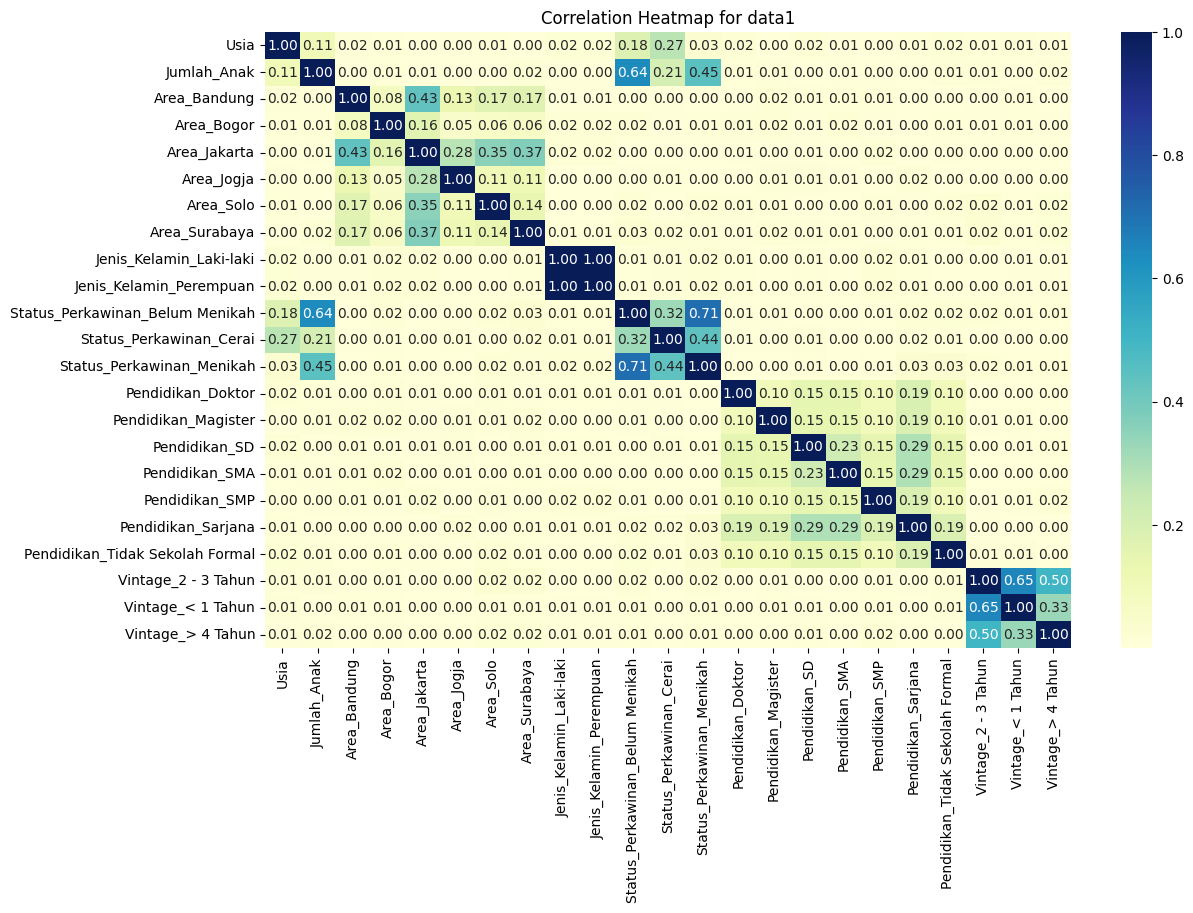

In [40]:
# Plot heatmap for data1
plt.figure(figsize=(13, 8))
sns.heatmap(corrtest1, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap for data1")
plt.show()

In [41]:
corrtest2

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Produk_Tabungan,1.000000,0.014734,0.034623,0.139139,0.008027,0.077088,0.153869,0.291752,0.004527
Produk_Deposito,0.014734,1.000000,0.016782,0.006236,0.001566,0.006622,0.460055,0.004554,0.059145
Produk_Kartu_Kredit,0.034623,0.016782,1.000000,0.008642,0.021552,0.019652,0.413171,0.018990,0.079988
Produk_Kredit_Rumah,0.139139,0.006236,0.008642,1.000000,0.019383,0.057235,0.456175,0.024236,0.068262
Produk_Kredit_Kendaraan,0.008027,0.001566,0.021552,0.019383,1.000000,0.023933,0.324242,0.000427,0.094714
Produk_Kredit_Dana_Tunai,0.077088,0.006622,0.019652,0.057235,0.023933,1.000000,0.464110,0.000056,0.077747
Total_Kepemilikan_Produk,0.153869,0.460055,0.413171,0.456175,0.324242,0.464110,1.000000,0.062893,0.168432
Pendapatan_Tahunan,0.291752,0.004554,0.018990,0.024236,0.000427,0.000056,0.062893,1.000000,0.004261
Total_Relationship_Balance,0.004527,0.059145,0.079988,0.068262,0.094714,0.077747,0.168432,0.004261,1.000000


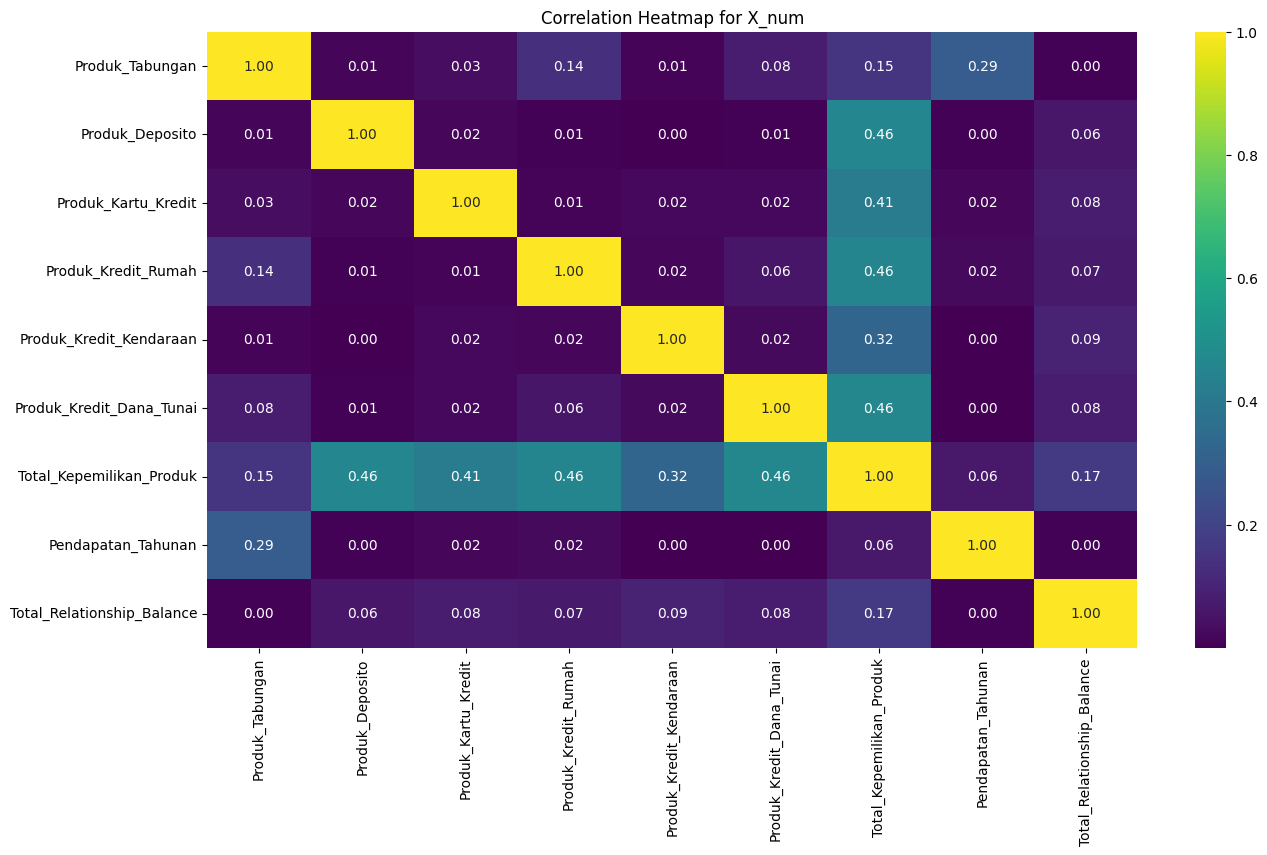

In [42]:
# Plot heatmap for X_num
plt.figure(figsize=(15, 8))
sns.heatmap(corrtest2, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Heatmap for X_num")
plt.show()

In [43]:
#Membuang nilai Redundan Rata Matriks
upper = corrtest1.where(np.triu(np.ones(corrtest1.shape),k=1).astype(bool))
upper1 = corrtest2.where(np.triu(np.ones(corrtest2.shape),k=1).astype(bool))

#Mencari nilai yang Berkorelasi di atas 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop1 = [column for column in upper1.columns if any(upper1[column] > 0.7)]

#Menghapus kolom yang berkorelasi di atas 0.7
data1 = data1.drop(to_drop,axis=1)
data2 = data2.drop(to_drop1,axis=1)

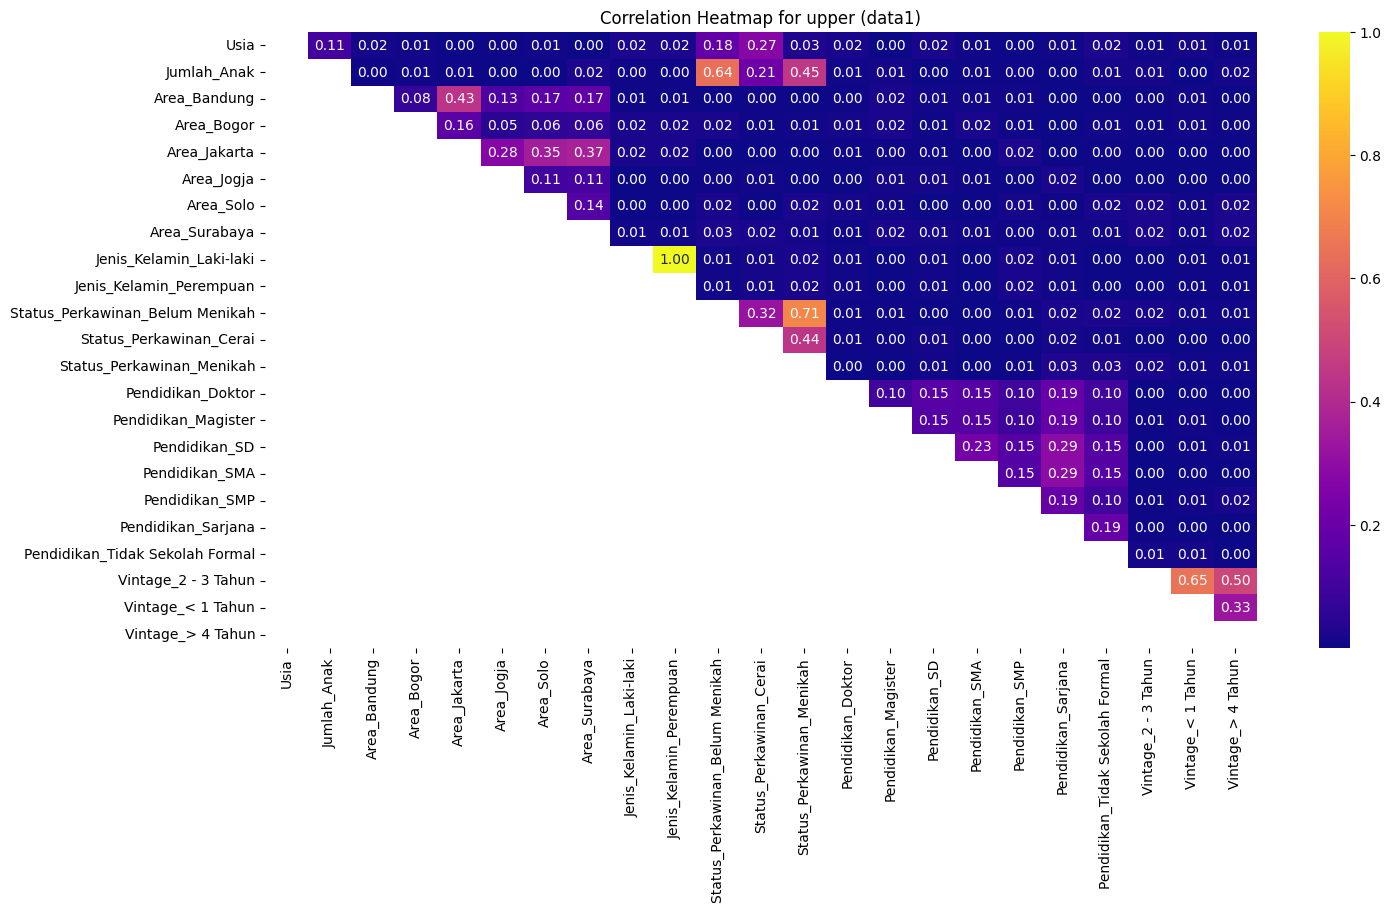

In [44]:
# Plot heatmap for upper
plt.figure(figsize=(16, 8))
sns.heatmap(upper, annot=True, cmap="plasma", fmt=".2f")
plt.title("Correlation Heatmap for upper (data1)")
plt.show()

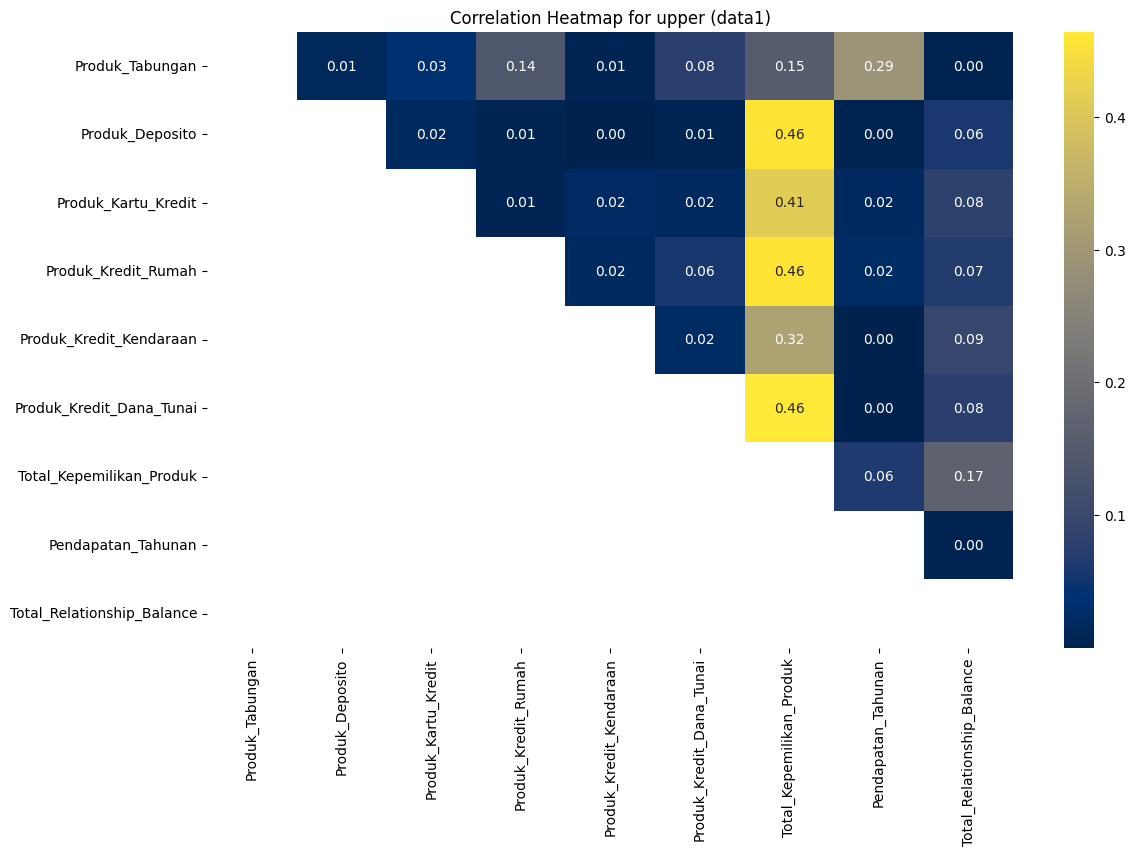

In [45]:
# Plot heatmap for upper
plt.figure(figsize=(13, 8))
sns.heatmap(upper1, annot=True, cmap="cividis", fmt=".2f")
plt.title("Correlation Heatmap for upper (data1)")
plt.show()

In [46]:
data1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,...,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,23.0,0,0,0,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
1,30.0,0,0,0,0,0,0,1,1,1,...,1,0,0,0,0,0,0,0,1,0
2,29.0,0,0,0,0,0,1,0,1,1,...,1,0,0,0,0,0,0,0,1,0
3,49.0,0,0,0,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
4,21.0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
8649,58.0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,1,1,0,0
8650,42.0,3,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
8651,44.0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0


In [47]:
X_num

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...
8648,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


#Gabungkan Keduanya antara data1 dengan X_num

In [48]:
data_combined = pd.concat([data1,X_num],axis=1, join ='inner')
data_combined

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,...,Vintage_> 4 Tahun,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,23.0,0,0,0,1,0,0,0,1,1,...,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,30.0,0,0,0,0,0,0,1,1,1,...,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,29.0,0,0,0,0,0,1,0,1,1,...,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,49.0,0,0,0,1,0,0,0,1,1,...,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,21.0,0,0,0,1,0,0,0,0,1,...,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,1,0,0,0,0,0,1,0,...,0,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,58.0,0,0,0,1,0,0,0,1,1,...,0,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,42.0,3,1,0,0,0,0,0,1,0,...,0,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,44.0,1,0,0,0,1,0,0,1,0,...,0,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


#Modeling & Evaluation

Pembangunan model akan menggunakan 2 algoritma:
  1. K-Means
  2. K-Medoid

dengan pengecekan silhouette score

#K-Means

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

##Experiment 0

In [66]:
# Variasi Hypermeter ( Jumlah Cluster )
for n_clusters in range(3,6):
  kmeans = KMeans(n_clusters=n_clusters, random_state=0)
  cluster_labels = kmeans.fit_predict(data_combined)
  silhouette_avg = silhouette_score(data_combined, cluster_labels)
  print(f"Silhouette Score (K-means) -"+str(n_clusters)+ " : "+str(silhouette_avg))
  data0['Clustering_KMeans_Exp0_'+str(n_clusters)] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-means) -3 : 0.4337636155000406


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-means) -4 : 0.41093123023700157


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-means) -5 : 0.32999985928593295


##Experiment 1

In [67]:
# Variasi Hypermeter ( Jumlah Cluster )
for n_clusters in range(3,6):
  kmeans = KMeans(n_clusters=n_clusters, random_state=0)
  cluster_labels = kmeans.fit_predict(data1)
  silhouette_avg = silhouette_score(data1, cluster_labels)
  print(f"Silhouette Score (K-means) -"+str(n_clusters)+ " : "+str(silhouette_avg))
  data0['Clustering_KMeans_Exp1_'+str(n_clusters)] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-means) -3 : 0.5001832110224678


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-means) -4 : 0.4618500330906909


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-means) -5 : 0.4114962944410271


##Experiment 2

In [68]:
# Variasi Hypermeter ( Jumlah Cluster )
for n_clusters in range(3,6):
  kmeans = KMeans(n_clusters=n_clusters, random_state=0)
  cluster_labels = kmeans.fit_predict(X_num)
  silhouette_avg = silhouette_score(X_num, cluster_labels)
  print(f"Silhouette Score (K-means) -"+str(n_clusters)+ " : "+str(silhouette_avg))
  data0['Clustering_KMeans_Exp2_'+str(n_clusters)] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-means) -3 : 0.18408368480533616


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-means) -4 : 0.19019713858843065


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-means) -5 : 0.19917934939547233


#K-Medoids

In [56]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.7 MB/s eta 0:00:00


In [57]:
from sklearn_extra.cluster import KMedoids

##Experiment 0

In [58]:
# Variasi Hypermeter ( Jumlah Cluster )
for n_clusters in range(3,6):
  kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
  cluster_labels = kmedoids.fit_predict(data_combined)
  silhouette_avg = silhouette_score(data_combined, cluster_labels)
  print(f"Silhouette Score (K-means) -"+str(n_clusters)+ " : "+str(silhouette_avg))
  data0['Clustering_KMedoids_Exp0_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-means) -3 : 0.43369790762336996
Silhouette Score (K-means) -4 : 0.33519427927551565
Silhouette Score (K-means) -5 : 0.3211940252247904


##Experiment 1

In [59]:
# Variasi Hypermeter ( Jumlah Cluster )
for n_clusters in range(3,6):
  kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
  cluster_labels = kmedoids.fit_predict(data1)
  silhouette_avg = silhouette_score(data1, cluster_labels)
  print(f"Silhouette Score (K-means) -"+str(n_clusters)+ " : "+str(silhouette_avg))
  data0['Clustering_KMedoids_Exp1_'+str(n_clusters)] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhouette Score (K-means) -3 : 0.0050675633465087746


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhouette Score (K-means) -4 : 0.4657942038387023


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhouette Score (K-means) -5 : 0.4178025801646672


##Experiment 2

In [60]:
# Variasi Hypermeter ( Jumlah Cluster )
for n_clusters in range(3,6):
  kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
  cluster_labels = kmedoids.fit_predict(X_num)
  silhouette_avg = silhouette_score(X_num, cluster_labels)
  print(f"Silhouette Score (K-means) -"+str(n_clusters)+ " : "+str(silhouette_avg))
  data0['Clustering_KMedoids_Exp2_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-means) -3 : 0.11659038864364947
Silhouette Score (K-means) -4 : 0.09680611087667028
Silhouette Score (K-means) -5 : 0.08883545658405254


#Analisa Hasil

In [69]:
data0.head()

,index,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,...,Clustering_KMeans_Exp2_5,Clustering_KMedoids_Exp0_3,Clustering_KMedoids_Exp0_4,Clustering_KMedoids_Exp0_5,Clustering_KMedoids_Exp1_3,Clustering_KMedoids_Exp1_4,Clustering_KMedoids_Exp1_5,Clustering_KMedoids_Exp2_3,Clustering_KMedoids_Exp2_4,Clustering_KMedoids_Exp2_5
0,0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,...,1,0,0,0,0,3,3,2,3,4
1,1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,...,1,0,0,0,0,3,3,2,3,3
2,2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,...,1,0,0,0,0,3,3,2,3,4
3,3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,...,1,2,2,2,0,1,0,2,2,3
4,4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,...,1,0,0,0,0,3,3,2,3,4


In [98]:
data0.columns

Index(['index', 'Area', 'Vintage', 'Usia', 'Jenis_Kelamin',
       'Status_Perkawinan', 'Jumlah_Anak', 'Pendidikan', 'Produk_Tabungan',
       'Produk_Deposito', 'Produk_Kartu_Kredit', 'Produk_Kredit_Rumah',
       'Produk_Kredit_Kendaraan', 'Produk_Kredit_Dana_Tunai',
       'Total_Kepemilikan_Produk', 'Pendapatan_Tahunan',
       'Total_Relationship_Balance', 'Clustering_KMeans_Exp0_3',
       'Clustering_KMeans_Exp0_4', 'Clustering_KMeans_Exp0_5',
       'Clustering_KMeans_Exp1_3', 'Clustering_KMeans_Exp1_4',
       'Clustering_KMeans_Exp1_5', 'Clustering_KMeans_Exp2_3',
       'Clustering_KMeans_Exp2_4', 'Clustering_KMeans_Exp2_5',
       'Clustering_KMedoids_Exp0_3', 'Clustering_KMedoids_Exp0_4',
       'Clustering_KMedoids_Exp0_5', 'Clustering_KMedoids_Exp1_3',
       'Clustering_KMedoids_Exp1_4', 'Clustering_KMedoids_Exp1_5',
       'Clustering_KMedoids_Exp2_3', 'Clustering_KMedoids_Exp2_4',
       'Clustering_KMedoids_Exp2_5'],
      dtype='object')

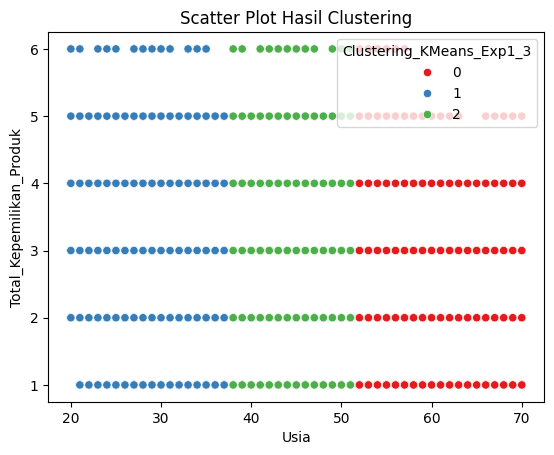

In [74]:
sns.scatterplot(data=data0, x='Usia', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp1_3', palette='Set1')
plt.title('Scatter Plot Hasil Clustering')
plt.show()

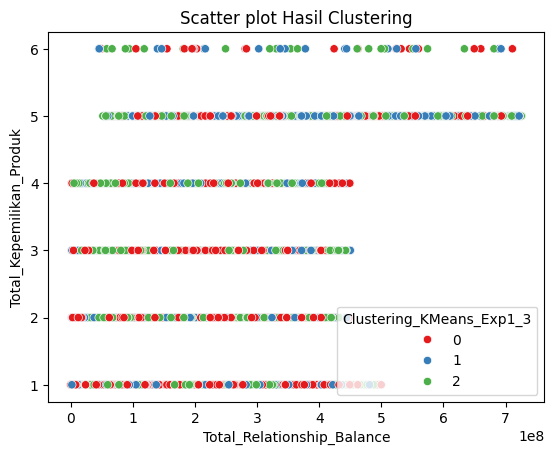

In [77]:
sns.scatterplot(data=data0,x='Total_Relationship_Balance',y='Total_Kepemilikan_Produk',hue='Clustering_KMeans_Exp1_3',palette='Set1')
plt.title('Scatter plot Hasil Clustering')
plt.show()

In [102]:
cluster_means = data0[['Usia','Jumlah_Anak','Produk_Tabungan','Produk_Deposito','Produk_Kartu_Kredit','Produk_Kredit_Rumah','Produk_Kredit_Kendaraan','Produk_Kredit_Dana_Tunai','Total_Kepemilikan_Produk','Total_Relationship_Balance','Clustering_KMeans_Exp1_3']].groupby('Clustering_KMeans_Exp1_3').mean()
print(cluster_means)
pd

                               Usia  Jumlah_Anak  Produk_Tabungan  \
Clustering_KMeans_Exp1_3                                            
0                         58.063617     1.474844         0.688565   
1                         29.503177     1.191528         1.000000   
2                         44.974856     1.295617         0.988107   

                          Produk_Deposito  Produk_Kartu_Kredit  \
Clustering_KMeans_Exp1_3                                         
0                                0.600416             0.342204   
1                                0.592436             0.308018   
2                                0.603126             0.333333   

                          Produk_Kredit_Rumah  Produk_Kredit_Kendaraan  \
Clustering_KMeans_Exp1_3                                                 
0                                    0.612474                 0.170062   
1                                    0.586989                 0.157337   
2                          

<module 'pandas' from '/usr/local/lib/python3.10/dist-packages/pandas/__init__.py'>

##Group 0

In [105]:
data0[data0['Clustering_KMeans_Exp1_3']==0][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include='all')

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,2405.000000,2405.000000,2405.000000,2.405000e+03
mean,58.063617,1.474844,2.955509,2.379434e+08
std,5.298230,1.478314,1.053131,1.382820e+08
min,52.000000,0.000000,1.000000,1.028000e+03
25%,54.000000,0.000000,2.000000,1.245667e+08
50%,57.000000,1.000000,3.000000,2.322131e+08
75%,61.000000,3.000000,4.000000,3.491686e+08
max,70.000000,4.000000,6.000000,7.181097e+08


In [106]:
data0[data0['Clustering_KMeans_Exp1_3']==0]['Area'].value_counts(normalize=True)

Jakarta     0.482328
Bandung     0.163825
Surabaya    0.125572
Solo        0.125572
Jogja       0.074012
Bogor       0.028690
Name: Area, dtype: float64

In [107]:
data0[data0['Clustering_KMeans_Exp1_3']==0]['Vintage'].value_counts(normalize=True)

2 - 3 Tahun    0.486486
< 1 Tahun      0.310603
> 4 Tahun      0.202911
Name: Vintage, dtype: float64

In [108]:
data0[data0['Clustering_KMeans_Exp1_3']==0]['Pendidikan'].value_counts(normalize=True)

Sarjana                 0.265281
SD                      0.197089
SMA                     0.179626
Tidak Sekolah Formal    0.103950
Doktor                  0.086486
SMP                     0.083992
Magister                0.083576
Name: Pendidikan, dtype: float64

In [109]:
data0[data0['Clustering_KMeans_Exp1_3']==0]['Jenis_Kelamin'].value_counts(normalize=True)

Laki-laki    0.672765
Perempuan    0.327235
Name: Jenis_Kelamin, dtype: float64

##Group 1

In [110]:
data0[data0['Clustering_KMeans_Exp1_3']==1][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include='all')

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,3305.000000,3305.000000,3305.000000,3.305000e+03
mean,29.503177,1.191528,3.243873,2.439352e+08
std,4.254972,1.480683,1.008655,1.452356e+08
min,20.000000,0.000000,1.000000,1.016565e+06
25%,26.000000,0.000000,3.000000,1.222784e+08
50%,30.000000,0.000000,3.000000,2.408255e+08
75%,33.000000,2.000000,4.000000,3.578412e+08
max,37.000000,4.000000,6.000000,7.228870e+08


In [111]:
data0[data0['Clustering_KMeans_Exp1_3']==1]['Area'].value_counts(normalize=True)

Jakarta     0.476248
Bandung     0.179728
Surabaya    0.126475
Solo        0.118306
Jogja       0.073222
Bogor       0.026021
Name: Area, dtype: float64

In [112]:
data0[data0['Clustering_KMeans_Exp1_3']==1]['Vintage'].value_counts(normalize=True)

2 - 3 Tahun    0.501967
< 1 Tahun      0.293192
> 4 Tahun      0.204841
Name: Vintage, dtype: float64

In [113]:
data0[data0['Clustering_KMeans_Exp1_3']==1]['Pendidikan'].value_counts(normalize=True)

Sarjana                 0.274130
SMA                     0.192436
SD                      0.180333
Doktor                  0.097731
Magister                0.087443
SMP                     0.084720
Tidak Sekolah Formal    0.083207
Name: Pendidikan, dtype: float64

In [114]:
data0[data0['Clustering_KMeans_Exp1_3']==1]['Jenis_Kelamin'].value_counts(normalize=True)

Laki-laki    0.640847
Perempuan    0.359153
Name: Jenis_Kelamin, dtype: float64

##Group 2

In [115]:
data0[data0['Clustering_KMeans_Exp1_3']==2][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include='all')

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,2943.000000,2943.000000,2943.000000,2.943000e+03
mean,44.974856,1.295617,3.158342,2.384758e+08
std,3.976996,1.474092,1.038061,1.439379e+08
min,38.000000,0.000000,1.000000,1.587496e+06
25%,42.000000,0.000000,2.000000,1.178243e+08
50%,45.000000,1.000000,3.000000,2.325173e+08
75%,48.000000,3.000000,4.000000,3.468223e+08
max,51.000000,4.000000,6.000000,7.259942e+08


In [116]:
data0[data0['Clustering_KMeans_Exp1_3']==2]['Area'].value_counts(normalize=True)

Jakarta     0.481821
Bandung     0.163099
Surabaya    0.132518
Solo        0.113829
Jogja       0.081210
Bogor       0.027523
Name: Area, dtype: float64

In [117]:
data0[data0['Clustering_KMeans_Exp1_3']==2]['Vintage'].value_counts(normalize=True)

2 - 3 Tahun    0.505607
< 1 Tahun      0.295957
> 4 Tahun      0.198437
Name: Vintage, dtype: float64

In [118]:
data0[data0['Clustering_KMeans_Exp1_3']==2]['Pendidikan'].value_counts(normalize=True)

Sarjana                 0.269113
SD                      0.185865
SMA                     0.180428
SMP                     0.096840
Doktor                  0.092083
Magister                0.089365
Tidak Sekolah Formal    0.086306
Name: Pendidikan, dtype: float64

In [119]:
data0[data0['Clustering_KMeans_Exp1_3']==2]['Jenis_Kelamin'].value_counts(normalize=True)

Laki-laki    0.675841
Perempuan    0.324159
Name: Jenis_Kelamin, dtype: float64